# Week3 day1 MLE vs MAP

__Recap__: In the problem of estimating the parameters, we can generalize the problem as 
$ P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}$, where $\theta$ is the parameter we are tryting to find out. The $X$ is the data or measurement of the random variable we are observing. 

Notice that this is a generalization of ML and MAP estimation. 

1. MLE 

We can take the MLE as a special case of MAP, where the prior is uniform distribution. So that we can write the equation as 

$ P(\theta|X)\propto P(X|\theta)$

(_To relate the notation with others often used: $P(X|\theta)$ is quivalent to $L(\theta|X)$ and $L(X; \theta)$. This is what we used in the ML to denote the likelihood function._)

2. MAP

If we know something about the probability of $\theta$, we can incorporate it into the equation in the form of the prior, $P(\theta)$

It is basically based on Bayes’ rule:

$ P(\theta|X)\propto P(X|\theta)P(\theta)$


## **Problem solving with MLE and MAP**

Problem description:

We have many apples that are all in different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, the scale is a broken scale.
We know that the scale returns the weight of the object with an error of +/- a standard deviation of 10g, which means that 

$error \sim \mathcal{N}(0, 10)$

Let's formulat the problem of measuring the weight of the apple as :

measurment=weight + $\mathcal{N}(0, 10)$

* Notice that here the 'weight' is the 'parameter' that we are going to estimate.
* The 'measurement' corresponds to the data 'x'. 

We can view it in this way: 

__error = measurement - weight = x - $\mu$__

__$p(x;\mu)= \mathcal{N}(x-\mu, 10)$__

Aiming at the estimate the weight of an apple, we can weigh the apple as many times as we want, so we’ll weigh it 100 times.

In [1]:
# load packages
import numpy as np
from scipy.stats import norm, invgamma
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats
from sklearn import preprocessing
import random
import math

###  Formulate the problem (a): the variance is known to be 10g

### __Task 1__: generage some measurement samples
which follows the $\mathcal{N}(70, 10)$

In [2]:
# generate evenly distributed samples that follow Normal distibution with defined mean and variance
mu, sigma = 70, 10 # mean and standard deviation
samples = np.random.normal(mu, sigma, 1000)

In [3]:
# randomly choose 100 samples
# TODO 
measurements = 

In [4]:
# plot histogram
hist,bin_edges = np.histogram(measurements)

plt.figure()
plt.bar(bin_edges[:-1], hist, width = 4)
plt.xlim(min(bin_edges)-10, max(bin_edges)+10)
plt.xlabel('measurements',fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('counts',fontsize=15)
plt.title('histogram of the measurements of an apple',fontsize=15)
plt.show()

## MLE

### __Task 2__:  define the likelihood function

__Our goal is to find the maximum likelihood estimate of $\mu$.__

For random variable x, the pdf is 

$p(x;\mu)=\frac{1}{\sqrt{2\pi\sigma^2}}exp(\frac{(x-\mu)^2}{2\sigma^2})$

The likelihood 

$\mathcal{L}(X;\mu)=\prod_{i=1}^{N}p(x_i;\mu)$     (N=100)

likelihood function: $\mathcal{l}(\mu)=\ln \mathcal{L}(X;\mu)=-\frac{N}{2}\ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}\sum_{k=1}^N(x_k-\mu)^2$

In [5]:
# define a pdf function of x 
# TODO: 

def fun_LL (X, mu ,sigma=10, N=100):
    
    return l


### __Task 3__:  Plot the likelihood function

Text(0, 0.5, 'Loglikelihood function')

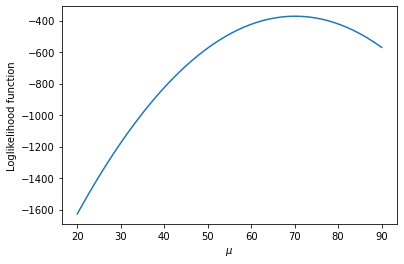

In [6]:
mu = np.linspace(20,90, 100)
X = measurements

value_LL = [fun_LL(X, mu_i) for mu_i in mu] # this is nested list
value_LL = np.array(value_LL)

plt.plot(mu, value_LL)
plt.xlabel('$\mu$')
plt.ylabel('Loglikelihood function')

In [7]:
# TODO
# find the postion where the loglikelihood function reaches its maximum value
ind =          # hint : use np.where
print(mu[ind])

[70.2020202]


### __Task 4__: Formulate the problem (b): both $\mu$ and $\sigma$ are unknown
plot the density/likelihood/posterior_probability function with respected to the paramters projected on 2D, and generate the estimate result, with the given functions

In [8]:
def get_log_likelihood_grid(measurments):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)

In [9]:
def get_mle(measurments):
    log_likelihood = get_log_likelihood_grid(measurments)
    idx = np.argwhere(log_likelihood == log_likelihood.max())[0][1]
    return WEIGHT_GUESSES[idx]

In [10]:
WEIGHT_GUESSES = np.linspace(50, 100, 100)
ERROR_GUESSES = np.linspace(10, 50, 100)

In [12]:
LL_grid =get_log_likelihood_grid(measurements)

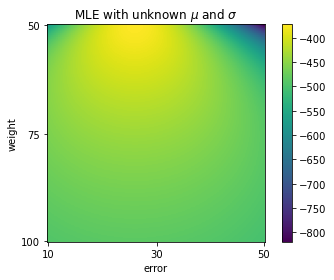

In [13]:
posX = [0, int(len(ERROR_GUESSES)/2), int(len(ERROR_GUESSES)-1)]
posY = [0, int(len(WEIGHT_GUESSES)/2), int(len(WEIGHT_GUESSES)-1)]

labels_X = ERROR_GUESSES[posX]
labels_Y = WEIGHT_GUESSES[posY]
labels_X = [int(labels_X[i]) for i in range(len(labels_X))]
labels_Y = [int(labels_Y[i]) for i in range(len(labels_Y))]

fig, ax = plt.subplots()
ax.set_xticks(posX)
ax.set_xticklabels(labels_X)
ax.set_yticks(posY)
ax.set_yticklabels(labels_Y)
ax.set_xlabel('error')
ax.set_ylabel('weight')
ax.set_title('MLE with unknown $\mu$ and $\sigma$')
plt.imshow(LL_grid)
plt.colorbar()


In [14]:
print(f"Maximum Likelihood estimate: {get_mle(measurements):.3f} g")

Maximum Likelihood estimate: 70.202 g


## MAP
### __Task 5__: Formulate the problem (c): both $\mu$ and $\sigma$ are unknown, and with priors
plot the priors, density/likelihood/posterior_probability function with respected to the paramters projected on 2D, and generate the estimate result, with the given functions

In [15]:
def get_map(measurments):
    log_likelihood = get_log_likelihood_grid(measurments)
    log_posterior = log_likelihood + LOG_PRIOR_GRID
    idx = np.argwhere(log_posterior == log_posterior.max())[0][1]
    return WEIGHT_GUESSES[idx]

In [16]:
# TODO:

In [17]:
# Try to change the prior values and distributions
PRIOR_WEIGHT = norm(85,40).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(.05).logpdf(ERROR_GUESSES)

In [18]:
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)

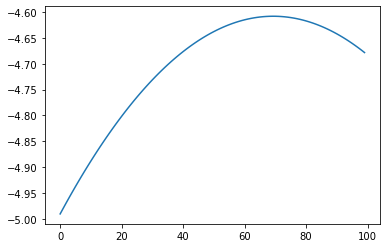

In [19]:
plt.plot(PRIOR_WEIGHT)

In [20]:
plt.plot(PRIOR_ERR)

In [21]:
posX = [0, int(len(ERROR_GUESSES)/2), int(len(ERROR_GUESSES)-1)]
posY = [0, int(len(WEIGHT_GUESSES)/2), int(len(WEIGHT_GUESSES)-1)]

labels_X = ERROR_GUESSES[posX]
labels_Y = WEIGHT_GUESSES[posY]
labels_X = [int(labels_X[i]) for i in range(len(labels_X))]
labels_Y = [int(labels_Y[i]) for i in range(len(labels_Y))]

fig, ax = plt.subplots()
ax.set_xticks(posX)
ax.set_xticklabels(labels_X)
ax.set_yticks(posY)
ax.set_yticklabels(labels_Y)
ax.set_xlabel('error')
ax.set_ylabel('weight')
ax.set_title('priors')
plt.imshow(LOG_PRIOR_GRID)
plt.colorbar()

In [22]:
# ERROR_GUESSES

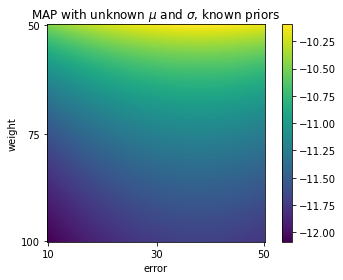

In [23]:
posX = [0, int(len(ERROR_GUESSES)/2), int(len(ERROR_GUESSES)-1)]
posY = [0, int(len(WEIGHT_GUESSES)/2), int(len(WEIGHT_GUESSES)-1)]

labels_X = ERROR_GUESSES[posX]
labels_Y = WEIGHT_GUESSES[posY]
labels_X = [int(labels_X[i]) for i in range(len(labels_X))]
labels_Y = [int(labels_Y[i]) for i in range(len(labels_Y))]

fig, ax = plt.subplots()
ax.set_xticks(posX)
ax.set_xticklabels(labels_X)
ax.set_yticks(posY)
ax.set_yticklabels(labels_Y)
ax.set_xlabel('error')
ax.set_ylabel('weight')
ax.set_title('MAP with unknown $\mu$ and $\sigma$, known priors')
plt.imshow(LOG_PRIOR_GRID)
plt.colorbar()

In [24]:
# 
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

In [25]:
print(f"Maximum A Posterior estimate: {get_map(measurements):.3f} g")

Maximum A Posterior estimate: 70.202 g
